In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv(r"C:\Users\berid\python\archive\AirPassengers.csv")

In [20]:
df.columns=['Date','Passengers']

In [21]:
df

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


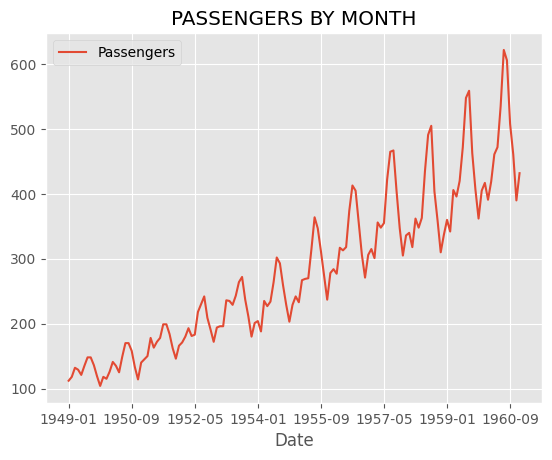

In [22]:
df.plot(title='PASSENGERS BY MONTH',x='Date')
plt.show()

In [23]:
df['Year']=df['Date'].str.split('-').str[0].str.strip().astype(int)
df['Month']=df['Date'].str.split('-').str[-1].str.strip().astype(int)

In [24]:
for i in range(1,21):
    df[f'shift{i}']=df['Passengers'].shift(i)
    
df=df.dropna()

In [25]:
len(df)

124

##### standard way 

In [26]:
train=df.iloc[:90,:]
test=df.iloc[90:,:]

xtrain,xtest,ytrain,ytest=train.drop(columns=['Date','Passengers']),test.drop(columns=['Date','Passengers']),train['Passengers'],test['Passengers']

In [27]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
model=LinearRegression()  #learning_rate=0.01,max_depth=5,n_estimators=1000

from sklearn import metrics

In [28]:
model.fit(xtrain,ytrain)

LinearRegression()

In [29]:
train_prediction=model.predict(xtrain)
test_prediction=model.predict(xtest)

In [30]:
r2_train=metrics.r2_score(train_prediction,ytrain)
r2_test=metrics.r2_score(test_prediction,ytest)
mae_train=metrics.mean_absolute_error(train_prediction,ytrain)
mae_test=metrics.mean_absolute_error(test_prediction,ytest)
rmse_train=metrics.mean_squared_error(train_prediction,ytrain,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,ytest,squared=False)
print('R2, MAE ,RMSE for train and test data are:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2, MAE ,RMSE for train and test data are:
0.9898842092291291 0.9612782997699566
5.98334700271767 11.903572161903867
7.833918909764606 15.259486946863397


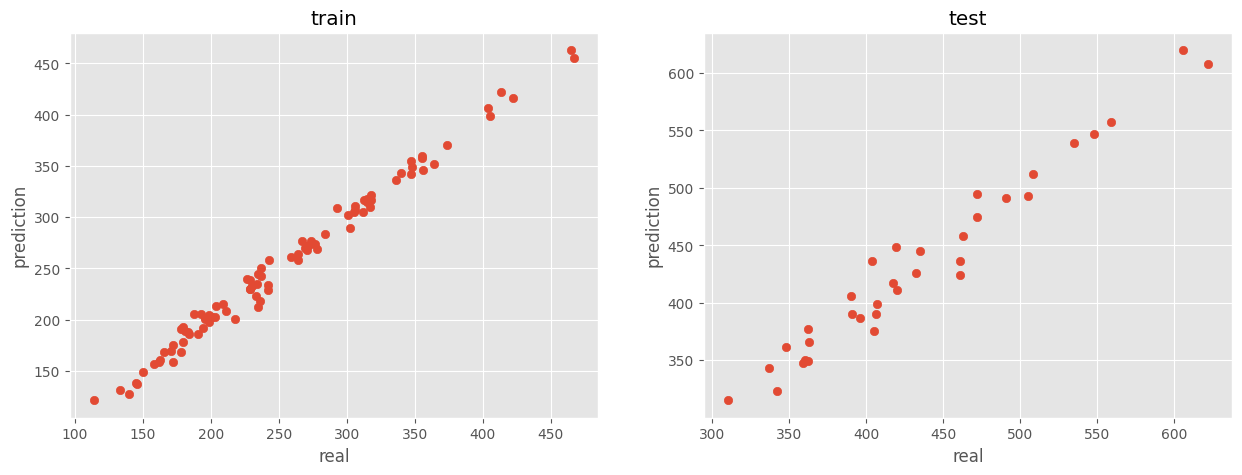

In [31]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(ytrain,train_prediction)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(ytest,test_prediction)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

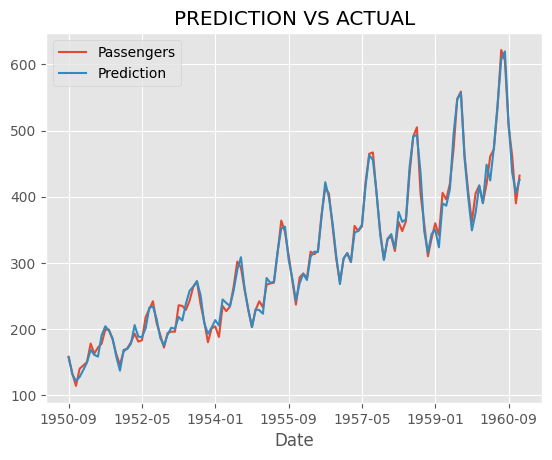

In [34]:
train['Prediction']=train_prediction
test['Prediction']=test_prediction
pred=pd.concat([train,test],ignore_index=True)

pred.plot(x='Date',y=['Passengers','Prediction'],title='PREDICTION VS ACTUAL')
plt.show()